In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
california_house = sklearn.datasets.fetch_california_housing()

In [3]:
california_house_df = pd.DataFrame(california_house.data , columns=california_house.feature_names)

In [4]:
california_house_df['price'] = california_house.target

In [5]:
california_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = california_house_df.drop('price' , axis=1)
Y = california_house_df['price']
print(X.shape , Y.shape)

(20640, 8) (20640,)


In [7]:
X_train , X_s , Y_train , Y_s = train_test_split(X , Y , test_size=0.4 ,random_state = 4)
X_cv , X_test , Y_cv , Y_test = train_test_split(X_s ,Y_s , test_size = 0.5 , random_state=4)

print(X_train.shape , X_cv.shape , X_test.shape)
print(Y_train.shape , Y_cv.shape , Y_test.shape)

(12384, 8) (4128, 8) (4128, 8)
(12384,) (4128,) (4128,)


In [8]:
lambda_ = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0]

J_train = []
J_cv =[]
W = []
b =[]
for i in range(len(lambda_)):
    alpha = lambda_[i]
    sgr = SGDRegressor(loss = 'squared_error', alpha=alpha , max_iter=100)

    scaler=StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)

    sgr.fit(X_train_norm , Y_train)
    Y_train_predict = sgr.predict(X_train_norm)
    b.append(sgr.intercept_)
    W.append(sgr.coef_)

    J_train.append(mean_squared_error(Y_train_predict , Y_train))

    X_cv_norm=scaler.transform(X_cv)
    Y_cv_predict = sgr.predict(X_cv_norm)

    J_cv.append(mean_squared_error(Y_cv_predict , Y_cv))
    print(f'lambda: {i} ')
    print(sgr)
    print(f'number of iters taken: {sgr.n_iter_} , number of weight updates: {sgr.t_} , {J_train[i]:0.4f} , {J_cv[i]:0.4f}')

lambda: 0 
SGDRegressor(alpha=0.1, max_iter=100)
number of iters taken: 8 , number of weight updates: 99073.0 , 0.6608 , 0.5505
lambda: 1 
SGDRegressor(alpha=0.2, max_iter=100)
number of iters taken: 7 , number of weight updates: 86689.0 , 0.6120 , 0.6041
lambda: 2 
SGDRegressor(alpha=0.3, max_iter=100)
number of iters taken: 7 , number of weight updates: 86689.0 , 0.6385 , 0.6352
lambda: 3 
SGDRegressor(alpha=0.4, max_iter=100)
number of iters taken: 7 , number of weight updates: 86689.0 , 0.6682 , 0.6664
lambda: 4 
SGDRegressor(alpha=0.5, max_iter=100)
number of iters taken: 7 , number of weight updates: 86689.0 , 0.7029 , 0.7031
lambda: 5 
SGDRegressor(alpha=0.6, max_iter=100)
number of iters taken: 7 , number of weight updates: 86689.0 , 0.7264 , 0.7310
lambda: 6 
SGDRegressor(alpha=0.7, max_iter=100)
number of iters taken: 7 , number of weight updates: 86689.0 , 0.7430 , 0.7489
lambda: 7 
SGDRegressor(alpha=0.8, max_iter=100)
number of iters taken: 7 , number of weight updates: 86

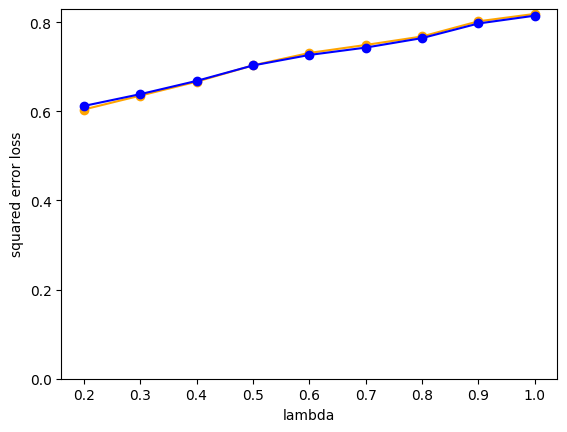

In [9]:
fig , ax = plt.subplots()

ax.plot( lambda_[1:] ,J_cv[1:] , color='orange' , marker='o' , label='J_cv')
ax.plot( lambda_[1:]  ,J_train[1:] ,color='blue' , marker='o' , label='J_train')
ax.set_xlabel('lambda')
ax.set_ylabel('squared error loss')
ax.set_yticks(np.arange(0, 1 ,0.2))
plt.show()

In [10]:
W_wt = W[1]
b_wt = b[1]

print(f'weights and bias : {W_wt} , {b_wt}')

weights and bias : [ 0.67083026  0.16598126 -0.04292986  0.02262108 -0.00649556  0.02183651
 -0.28016507 -0.24770669] , [2.07370794]


In [11]:
from sklearn import metrics
X_test_norm = scaler.transform(X_test)
Y_test_predict = sgr.predict(X_test_norm)

J_test=mean_squared_error(Y_test_predict , Y_test)
r2_test = metrics.mean_absolute_error(Y_test_predict, Y_test)
print(J_test)
print(r2_test)

0.8280333818727096
0.7040742026865174


In [12]:
print(f'{np.dot(W_wt, X_train_norm[80])+b_wt}')
print(Y_train[80])

[2.51692498]
1.625


In [13]:
X_features = ['MedInc' , 'HouseAge' , 'AveRooms' , 'AveBedrms' , 'Population' , 'AveOccup', 'Latitude' , 'Longitude']

IndexError: ignored

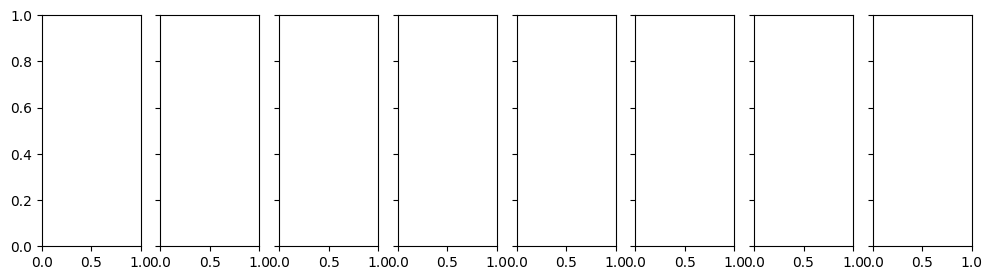

In [15]:
# fig,ax=plt.subplots(1, 8,figsize=(12,3),sharey=True)
# for i in X_features:
#     ax[i].scatter(X_test[id],Y_train, label = 'target')
#     ax[i].set_xlabel(X_features[i])
#     ax[i].scatter(X_test[i],Y_test_predict , label = 'predict')
# ax[0].set_ylabel("Price"); ax[0].legend();
# fig.suptitle("target versus prediction using z-score normalized model")
# plt.show()

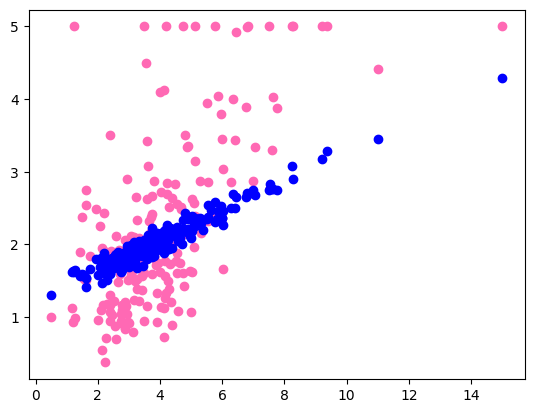

In [22]:
X_medinc = X_test['MedInc']
X_medinc = X_medinc[:200]
fig , ax = plt.subplots()

ax.scatter(X_medinc , Y_test[:200] , color='hotpink')
ax.scatter(X_medinc , Y_test_predict[:200] , color='blue')